# Corelation

Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.

If two variables are related to each other in such a way that's change in one creates a corresponding change in other.

It helps in measure and analyze the degree or extent to which two or more variables fluctuate with reference to one another.

Sometimes it is also called CO-VARIATION.


# Import libraries

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr

# Reading the data

In [61]:
data=pd.read_csv('hcvdata.csv')

In [62]:
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


# Data Cleaning

In [66]:
data['Category'].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [67]:
category=[]
for d in data['Category']:
    d=d.split('=')[1]
    category.append(d)
data['Category']=category


In [70]:
data.Category.unique()

array(['Blood Donor', 'suspect Blood Donor', 'Hepatitis', 'Fibrosis',
       'Cirrhosis'], dtype=object)

In [83]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [102]:
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [84]:
data.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


# Corelation for Hepatitis

Text(0.5, 1.0, 'Hepatitis')

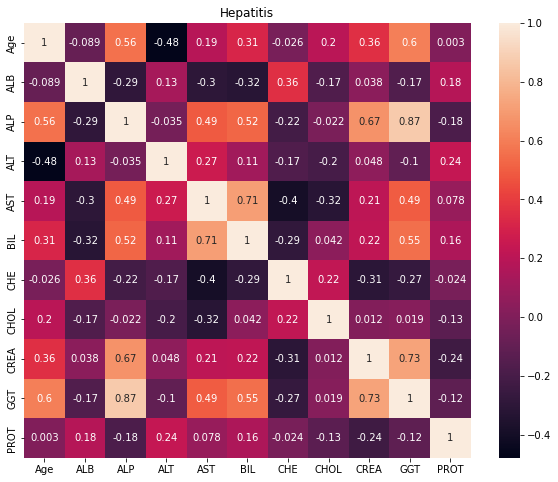

In [91]:
hep=data[data['Category']=='Hepatitis']
correlation_mat=hep.corr().round(3)
plt.figure(figsize=(10,8))
plot=sns.heatmap(correlation_mat,annot=True)
plot.set_title("Hepatitis")

from the above heatmap we conclude that crea and ggt show strong positive corelation between them than any other variable

# Corelation for Blood Donor

Text(0.5, 1.0, 'Blood Donor')

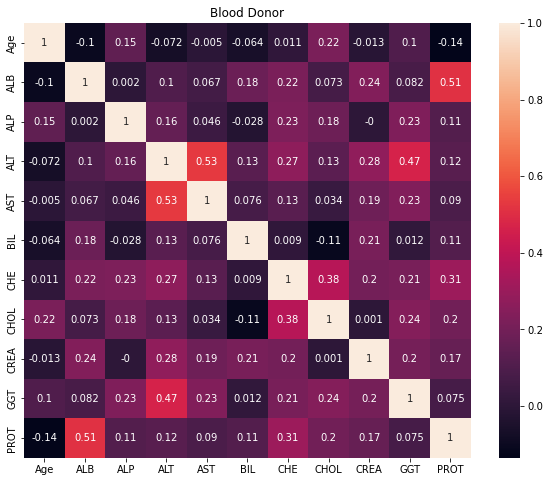

In [94]:
bd=data[data['Category']=='Blood Donor']
correlation_mat_bd=bd.corr().round(3)
plt.figure(figsize=(10,8))
plot=sns.heatmap(correlation_mat_bd,annot=True)
plot.set_title("Blood Donor")

Text(0.5, 1.0, 'suspect Blood Donor')

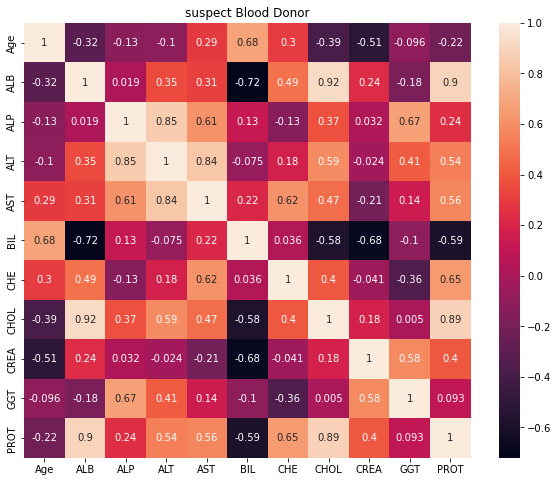

In [96]:
sbd=data[data['Category']=='suspect Blood Donor']
correlation_mat_sbd=sbd.corr().round(3)
plt.figure(figsize=(10,8))
plot=sns.heatmap(correlation_mat_sbd,annot=True)
plot.set_title("suspect Blood Donor")

Text(0.5, 1.0, 'Fibrosis')

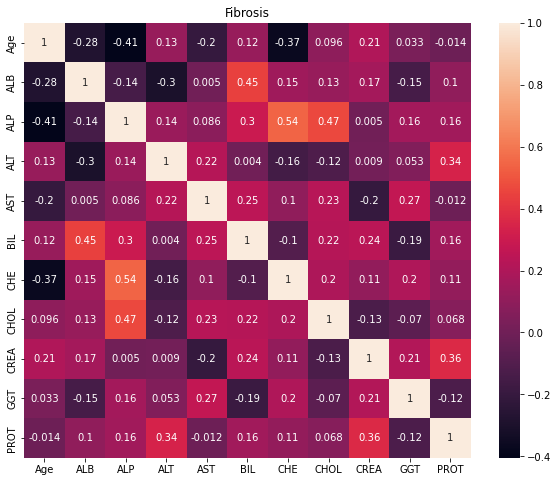

In [98]:
fib=data[data['Category']=='Fibrosis']
correlation_mat_fib=fib.corr().round(3)
plt.figure(figsize=(10,8))
plot=sns.heatmap(correlation_mat_fib,annot=True)
plot.set_title("Fibrosis")

Text(0.5, 1.0, 'Cirrhosis')

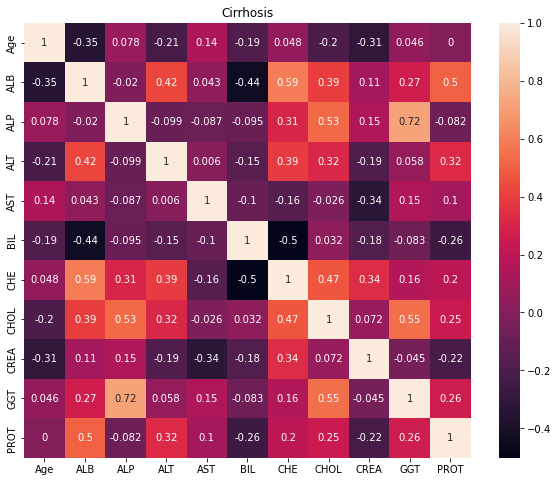

In [99]:
cir=data[data['Category']=='Cirrhosis']
correlation_mat_cir=cir.corr().round(3)
plt.figure(figsize=(10,8))
plot=sns.heatmap(correlation_mat_cir,annot=True)
plot.set_title("Cirrhosis")